In [53]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
# Run Multicolinaryty 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [54]:
df = pd.read_csv('df_clean.csv')

In [55]:
# If we choose to put the datetime index the pairplot will not work because of the duplicated dates. 
df.date = pd.to_datetime(df.date)
df = df.set_index('date')

# Correlation analysis 
* Some values are very correlated and others are not
* We can see that more the team as a low rank more the overall scores are low 
* When scores are high/low in some categories it tends to be high on the others two 
* We get a confirmation than the away_team_score is negatively correlate on the result 

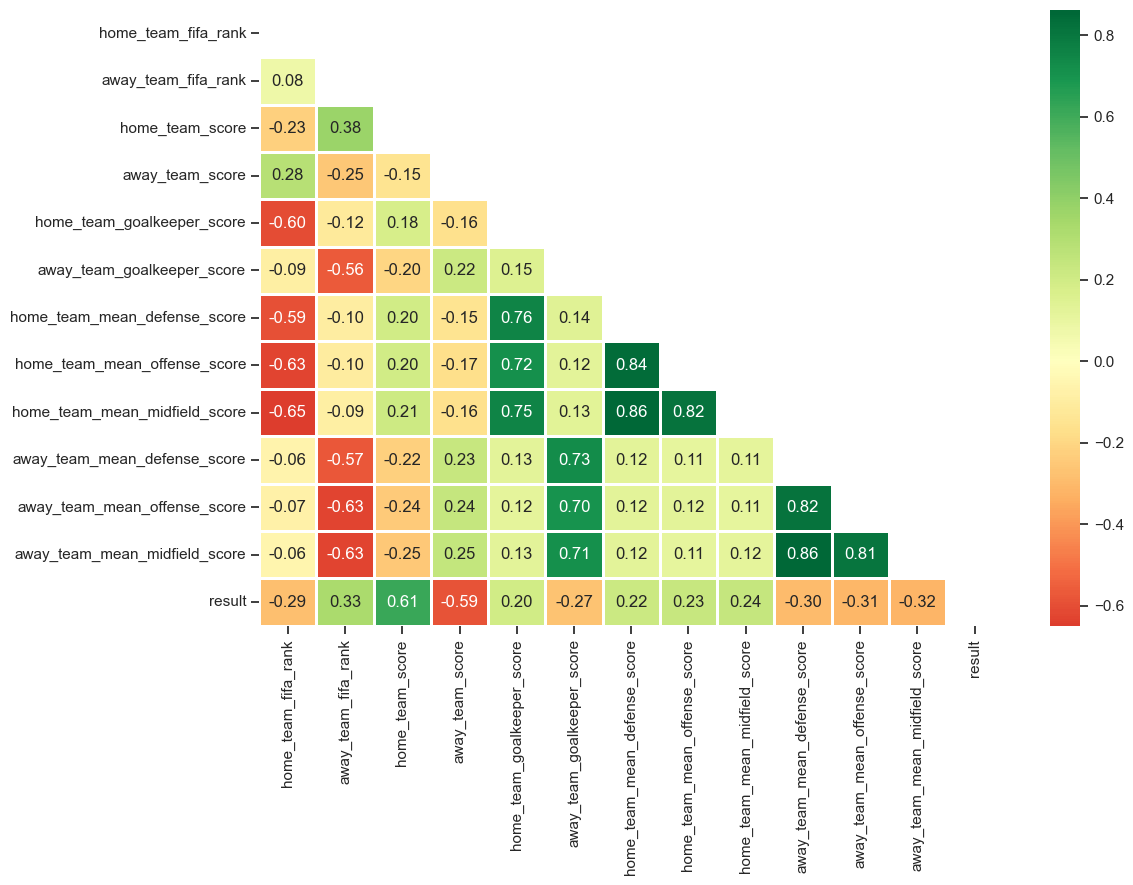

In [56]:
# Create the correlation matrix
corr_mean = df.corr(method = 'pearson')

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(12,8)) 
ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.set_yticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


KeyboardInterrupt



Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000015727E51E10> (for post_execute):


KeyboardInterrupt: 

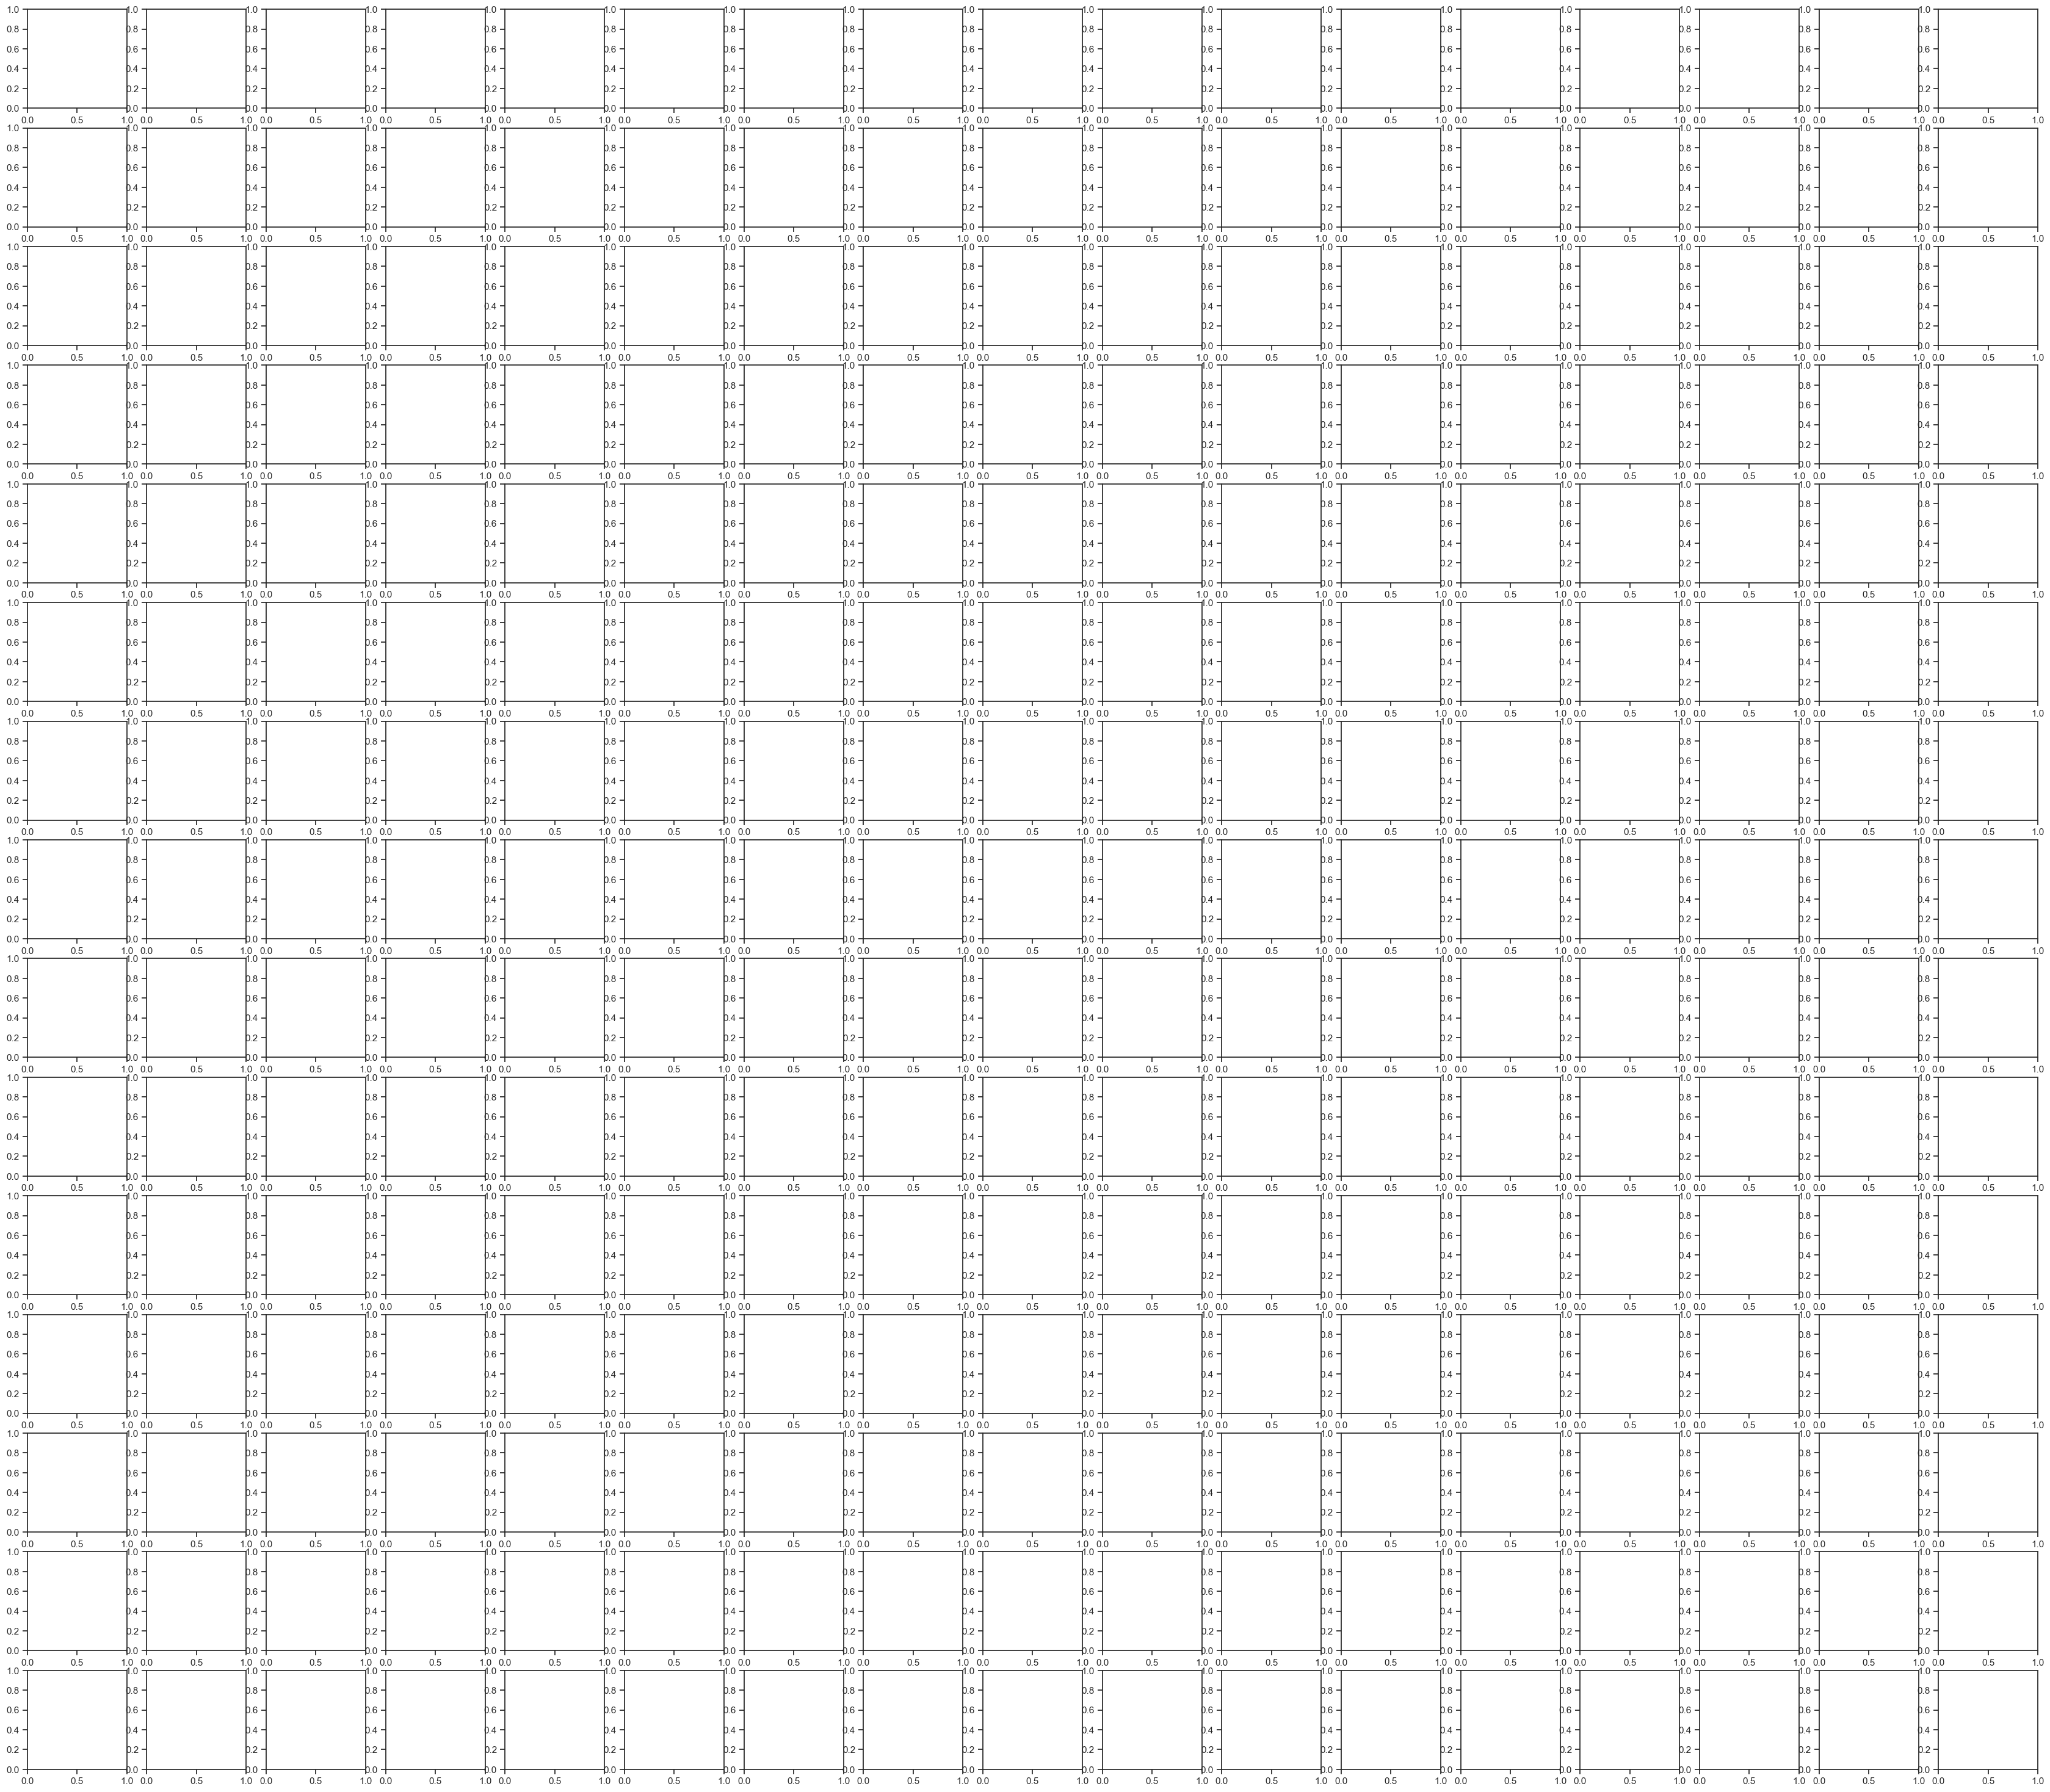

In [5]:

sns.set_theme(style="ticks")

a = sns.pairplot(df, kind="kde")

In [17]:
df.head()

,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
date,,,,,,,,,,,,,,,,,,,,,
1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Conversion des pays en numériques
le = preprocessing.LabelEncoder()
df['home_team'] = le.fit_transform(df['home_team'])
df['away_team'] = le.fit_transform(df['away_team'])

In [33]:
# Countries mapping / Important for our webapp 
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'American Samoa': 3, 'Andorra': 4, 'Angola': 5, 'Antigua and Barbuda': 6, 'Argentina': 7, 'Armenia': 8, 'Australia': 9, 'Austria': 10, 'Azerbaijan': 11, 'Bahrain': 12, 'Bangladesh': 13, 'Barbados': 14, 'Belarus': 15, 'Belgium': 16, 'Belize': 17, 'Benin': 18, 'Bermuda': 19, 'Bhutan': 20, 'Bolivia': 21, 'Bosnia and Herzegovina': 22, 'Botswana': 23, 'Brazil': 24, 'Bulgaria': 25, 'Burkina Faso': 26, 'Burundi': 27, 'Cabo Verde': 28, 'Cambodia': 29, 'Cameroon': 30, 'Canada': 31, 'Cayman Islands': 32, 'Central African Republic': 33, 'Chad': 34, 'Chile': 35, 'China PR': 36, 'Chinese Taipei': 37, 'Colombia': 38, 'Comoros': 39, 'Congo': 40, 'Congo DR': 41, 'Costa Rica': 42, 'Croatia': 43, 'Cuba': 44, 'Curaçao': 45, 'Cyprus': 46, 'Czech Republic': 47, "Côte d'Ivoire": 48, 'Denmark': 49, 'Djibouti': 50, 'Dominica': 51, 'Ecuador': 52, 'Egypt': 53, 'El Salvador': 54, 'England': 55, 'Equatorial Guinea': 56, 'Eritrea': 57, 'Estonia': 58, 'Eswatini': 59, '

In [27]:
df

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,shoot_out,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,result
date,,,,,,,,,,,,,,,,,,
1993-08-08,24,117,8,14,0,0,1,1,0,85.941860,79.248175,85.902907,86.538372,85.355233,76.813139,79.659854,77.708759,1
1993-08-08,52,193,35,94,0,0,5,0,0,71.275510,67.595745,70.599091,75.413265,75.042857,72.443243,74.760000,73.500000,3
1993-08-15,9,31,52,46,0,0,2,1,1,78.088710,71.726190,72.558065,74.718548,74.060484,68.810714,71.543210,72.527381,3
1993-08-15,180,24,22,8,0,0,1,1,0,79.368421,86.369128,79.753509,83.721053,78.356140,86.066443,86.607383,85.288591,1
1993-08-22,6,139,5,70,0,0,2,1,0,80.490566,69.581395,82.635220,88.293082,84.132704,70.993878,76.436735,73.813636,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-12,164,142,14,8,1635,1674,1,0,0,85.000000,82.000000,78.500000,76.700000,79.500000,85.200000,86.000000,84.500000,3
2022-06-12,153,154,65,25,1378,1547,2,2,0,91.000000,80.000000,73.000000,77.000000,76.200000,75.800000,80.300000,81.800000,1
2022-06-13,63,43,3,16,1789,1621,0,1,0,87.000000,82.000000,84.200000,88.300000,86.800000,77.800000,76.700000,84.200000,0


## Vif Analysis
* It apperars to have 3 columns over Vif>5 , we should remove it 

In [34]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def variance_inflation_factors(exog_df):
    '''
    Parameters
    ----------
    exog_df : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

variance_inflation_factors(df)

const                            749.654065
home_team                          1.032244
away_team                          1.020054
home_team_fifa_rank                2.055640
away_team_fifa_rank                2.064082
home_team_score                    2.024067
away_team_score                    1.866640
home_team_goalkeeper_score         2.749519
away_team_goalkeeper_score         2.424855
home_team_mean_defense_score       5.319063
home_team_mean_offense_score       4.157882
home_team_mean_midfield_score      4.955888
away_team_mean_defense_score       4.913831
away_team_mean_offense_score       3.842853
away_team_mean_midfield_score      4.742042
result                             2.741736
Name: VIF, dtype: float64

In [60]:
df.head()

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,shoot_out,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,result
date,,,,,,,,,,,,,,,,,,,
1993-08-08,Brazil,Mexico,8,14,0,0,1,1,8,0,85.941860,79.248175,85.902907,86.538372,85.355233,76.813139,79.659854,77.708759,2
1993-08-08,Ecuador,Venezuela,35,94,0,0,5,0,7,0,71.275510,67.311111,70.599091,75.413265,75.042857,72.305714,74.660417,73.423810,3
1993-08-15,Australia,Canada,52,46,0,0,2,1,7,1,78.088710,71.726190,72.558065,74.718548,74.060484,68.810714,71.543210,72.527381,3
1993-08-15,Uruguay,Brazil,22,8,0,0,1,1,7,0,79.368421,86.371622,79.753509,83.721053,78.356140,86.077027,86.625000,85.312162,2
1993-08-22,Argentina,Peru,5,70,0,0,2,1,7,0,80.500000,69.581395,82.644304,88.286709,84.138608,70.993878,76.436735,73.813636,3


In [57]:
df = df.drop([ 'home_team_score', "away_team_score" ], axis=1)




In [58]:
df.head()

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,result
date,,,,,,,,,,,,,
1993-08-08,Brazil,Mexico,8,14,85.941860,79.248175,85.902907,86.538372,85.355233,76.813139,79.659854,77.708759,1
1993-08-08,Ecuador,Venezuela,35,94,71.275510,67.595745,70.599091,75.413265,75.042857,72.443243,74.760000,73.500000,3
1993-08-15,Australia,Canada,52,46,78.088710,71.726190,72.558065,74.718548,74.060484,68.810714,71.543210,72.527381,3
1993-08-15,Uruguay,Brazil,22,8,79.368421,86.369128,79.753509,83.721053,78.356140,86.066443,86.607383,85.288591,1
1993-08-22,Argentina,Peru,5,70,80.490566,69.581395,82.635220,88.293082,84.132704,70.993878,76.436735,73.813636,3


In [52]:
df.to_csv('df_for_ML.csv', encoding='utf-8', index=True)

#### df.to_csv('df_for_ML.csv', encoding='utf-8', index=True)

In [59]:
#df.to_csv('df_for_ML.csv', encoding='utf-8', index=True)
dfnotnumeric = df
dfnotnumeric.to_csv('df_for_ML_countries_not_numeric.csv', encoding='utf-8', index=True)